In [1]:
%cd ~/protein-transfer

/home/francesca/protein-transfer


In [2]:
%load_ext blackcellmagic
%load_ext autoreload
%autoreload 2

In [3]:
from __future__ import annotations

import ast

import numpy as np
import pandas as pd

from scr.params.emb import MODEL_SIZE, MODEL_LAYER
from scr.params.vis import ORDERED_TASK_LIST, TASK_LEGEND_MAP

In [4]:
# try to under the scalbility for both model size and degree pretrain
# the highest performing layer of the smallest to the largest

In [5]:
result_df_path = "results/summary/all_results.csv"

result_df = pd.read_csv(result_df_path)

# check column name existance
for c in ["metric", "ablation", "arch", "value", "task", "model", "ptp"]:
    assert c in result_df.columns, f"{c} not in df from {result_df_path}"

# Convert the string of lists to NumPy arrays
result_df["value"] = result_df["value"].apply(ast.literal_eval).apply(np.array)

# make ptp float
result_df["ptp"] = result_df["ptp"].astype(float)

result_df

,arch,task,model,ablation,ptp,metric,value
0,carp,proeng_aav_one_vs_many_mean,carp_640M,emb,1.0,train_loss,"[9.59526940116963, 6.894266263718891, 6.377686..."
1,carp,proeng_aav_one_vs_many_mean,carp_640M,emb,1.0,val_loss,"[11.18654191999164, 8.622644328345816, 8.33617..."
2,carp,proeng_aav_one_vs_many_mean,carp_640M,emb,1.0,test_loss,"[13.582533778622887, 53.712009437112215, 74.04..."
3,carp,proeng_aav_one_vs_many_mean,carp_640M,emb,1.0,test_performance_1,"[0.9704321391244177, 0.9629028051372428, 0.962..."
4,carp,proeng_aav_one_vs_many_mean,carp_640M,emb,1.0,test_performance_2,"[0.19544242309285326, 0.3282696048440418, 0.31..."
...,...,...,...,...,...,...,...
1629,esm,annotation_scl_balanced,onehot,onehot,0.0,train_loss,[0.3524752729817441]
1630,esm,annotation_scl_balanced,onehot,onehot,0.0,val_loss,[1.373852210385459]
1631,esm,annotation_scl_balanced,onehot,onehot,0.0,test_loss,[2.0159953236579895]
1632,esm,annotation_scl_balanced,onehot,onehot,0.0,test_performance_2,[0.37402597402597404]


In [6]:
prepped_df = result_df.copy()

# add task type and model size details for plotting legends
prepped_df["task_type"] = prepped_df["task"].str.split("_").str[0]
prepped_df["model_size"] = prepped_df["model"].map(MODEL_SIZE)
prepped_df["model_layer"] = prepped_df["model"].map(MODEL_LAYER)

# get rid of pooling details
prepped_df["task"] = prepped_df["task"].str.replace("_mean", "")
prepped_df["task"] = prepped_df["task"].str.replace("_noflatten", "")

# sort based on given task order for plot legend
prepped_df["task"] = pd.Categorical(
    prepped_df["task"], categories=ORDERED_TASK_LIST, ordered=True
).map(TASK_LEGEND_MAP)
prepped_df = prepped_df.sort_values(["task", "ptp"], ascending=[True, False])

prepped_df

,arch,task,model,ablation,ptp,metric,value,task_type,model_size,model_layer
80,carp,GB1 - sampled,carp_640M,emb,1.0,train_loss,"[2.5043217133381526, 1.8768573377906583, 1.809...",proeng,640.00,56
81,carp,GB1 - sampled,carp_640M,emb,1.0,val_loss,"[2.4487856676276403, 1.889322691593076, 1.8535...",proeng,640.00,56
82,carp,GB1 - sampled,carp_640M,emb,1.0,test_loss,"[2.5326230877883487, 1.9205839668776579, 1.879...",proeng,640.00,56
83,carp,GB1 - sampled,carp_640M,emb,1.0,test_performance_1,"[0.8536247926960799, 0.9469106827092577, 0.949...",proeng,640.00,56
84,carp,GB1 - sampled,carp_640M,emb,1.0,test_performance_2,"[0.433213705534327, 0.8222689931610957, 0.8221...",proeng,640.00,56
...,...,...,...,...,...,...,...,...,...,...
1586,esm,NaN,esm1_t6_43M_UR50S,stat,0.0,val_loss,"[0.9926145014009977, 0.9802829968301874, 0.972...",structure,43.00,6
1593,esm,NaN,esm1b_t33_650M_UR50S,stat,0.0,train_loss,"[0.9954574287754215, 0.976576955351111, 0.9950...",structure,650.00,33
1594,esm,NaN,esm1b_t33_650M_UR50S,stat,0.0,val_loss,"[0.9926900832276595, 0.9727039494012532, 0.995...",structure,650.00,33
1621,esm,NaN,onehot,onehot,0.0,train_loss,[1.0096537658613023],structure,0.02,1


In [7]:

# Count the number of rows with NaN values to make sure just structure_ss3_tape_processed - should be 76
prepped_df.isna().any(axis=1).sum()

76

In [8]:
# get last layer for each arch 
# then plot x as model size and y as performance 
# two kinds of lines for esm and carp

In [9]:
def get_best_metric_df(
    df: pd.DataFrame, metric: str = "test_performance_1", arch: str = "", bestorlast: str = "best"
) -> pd.DataFrame:

    """
    A function for cleaning up the df to get best layer based on chosen metric
    """

    slice_df = df[(df["metric"] == metric)].copy()

    slice_df = slice_df[
        (slice_df["ablation"] == "onehot") | (slice_df["ablation"] == "emb")
    ]

    # comb carp and esm
    if arch != "":
        slice_df = slice_df[(slice_df["arch"] == arch)].copy()

    if bestorlast == "best":

        # get the max perform layer
        slice_df["best_value"] = slice_df["value"].apply(np.max)
        slice_df["best_layer"] = slice_df["value"].apply(np.argmax)
        
        # Find the index of the maximum value in 'value_column' for each group
        max_indices = slice_df.groupby(["task", "ablation"])["best_value"].idxmax().dropna()

        # Use loc to select the rows corresponding to the max indices
        slice_df = slice_df.loc[max_indices]
    
    elif bestorlast == "last":

        # get last layer
        slice_df["last_value"] = slice_df["value"].apply(lambda x: x[-1] if len(x) > 0 else None)
    
    else:
        print(f"{bestorlast} is not 'best' or 'last'")


    return slice_df.copy()

In [13]:
metric = "test_performance_1"
carp_df = get_best_metric_df(df=prepped_df, metric=metric, arch="carp", bestorlast="last")
esm_df = get_best_metric_df(df=prepped_df, metric=metric, arch="esm", bestorlast="last")
esm_df

,arch,task,model,ablation,ptp,metric,value,task_type,model_size,model_layer,last_value
1138,esm,GB1 - sampled,esm1_t34_670M_UR50S,emb,1.0,test_performance_1,"[0.8694812739489748, 0.9495267864557306, 0.954...",proeng,670.00,34,0.977456
1143,esm,GB1 - sampled,esm1b_t33_650M_UR50S,emb,1.0,test_performance_1,"[0.8745456721944233, 0.9569111956879088, 0.975...",proeng,650.00,33,0.976743
1148,esm,GB1 - sampled,esm1_t12_85M_UR50S,emb,1.0,test_performance_1,"[0.8693369443460971, 0.9428691804253423, 0.955...",proeng,85.00,12,0.965849
1153,esm,GB1 - sampled,esm1_t6_43M_UR50S,emb,1.0,test_performance_1,"[0.8693220857557405, 0.940376842635973, 0.9666...",proeng,43.00,6,0.969632
1453,esm,GB1 - sampled,onehot,onehot,0.0,test_performance_1,[0.9342600571731149],proeng,0.02,1,0.934260
1118,esm,GB1 - low vs high,esm1b_t33_650M_UR50S,emb,1.0,test_performance_1,"[0.903277878702286, 0.9335615212571972, 0.9457...",proeng,650.00,33,0.954810
1123,esm,GB1 - low vs high,esm1_t12_85M_UR50S,emb,1.0,test_performance_1,"[0.8998331118047598, 0.9248533871544505, 0.936...",proeng,85.00,12,0.939664
1128,esm,GB1 - low vs high,esm1_t34_670M_UR50S,emb,1.0,test_performance_1,"[0.9001212919501395, 0.9239884106674877, 0.930...",proeng,670.00,34,0.946929
1133,esm,GB1 - low vs high,esm1_t6_43M_UR50S,emb,1.0,test_performance_1,"[0.9000871691822822, 0.9244217917578988, 0.940...",proeng,43.00,6,0.939178
1448,esm,GB1 - low vs high,onehot,onehot,0.0,test_performance_1,[0.9178409557926928],proeng,0.02,1,0.917841


In [22]:
esm_df = esm_df[~esm_df["model"].isin(["esm1b_t33_650M_UR50S"])]

# ignore ptp not 1 or 0
# Select rows where 'Column2' has a value from the list
carp_df = carp_df[carp_df["ptp"].isin(esm_df["ptp"].unique())]
carp_df

,arch,task,model,ablation,ptp,metric,value,task_type,model_size,model_layer,last_value
83,carp,GB1 - sampled,carp_640M,emb,1.0,test_performance_1,"[0.8536247926960799, 0.9469106827092577, 0.949...",proeng,640.00,56,0.973782
88,carp,GB1 - sampled,carp_76M,emb,1.0,test_performance_1,"[0.8559977204197046, 0.9466847539894716, 0.952...",proeng,76.00,32,0.968988
93,carp,GB1 - sampled,carp_600k,emb,1.0,test_performance_1,"[0.8685589484637927, 0.9384991818538692, 0.923...",proeng,0.60,16,0.944384
98,carp,GB1 - sampled,carp_38M,emb,1.0,test_performance_1,"[0.8563895876302393, 0.9469366069402461, 0.951...",proeng,38.00,16,0.968653
383,carp,GB1 - sampled,onehot,onehot,0.0,test_performance_1,[0.9342600571731149],proeng,0.02,1,0.934260
43,carp,GB1 - low vs high,carp_76M,emb,1.0,test_performance_1,"[0.9098403111057047, 0.9240867458839279, 0.921...",proeng,76.00,32,0.944332
48,carp,GB1 - low vs high,carp_640M,emb,1.0,test_performance_1,"[0.9092474823267062, 0.9249272815024818, 0.926...",proeng,640.00,56,0.946169
53,carp,GB1 - low vs high,carp_38M,emb,1.0,test_performance_1,"[0.9086479144024339, 0.9243150210901128, 0.926...",proeng,38.00,16,0.941338
58,carp,GB1 - low vs high,carp_600k,emb,1.0,test_performance_1,"[0.916161647887271, 0.9155941083889623, 0.9154...",proeng,0.60,16,0.916367
373,carp,GB1 - low vs high,onehot,onehot,0.0,test_performance_1,[0.9178409557926928],proeng,0.02,1,0.917841


In [15]:
import math
import matplotlib.pyplot as plt

from scr.params.vis import (
    ORDERED_TASK_LIST,
    TASK_LEGEND_MAP,
    TASK_COLORS,
    TASK_SIMPLE_COLOR_MAP,
    PLOT_EXTS,
)

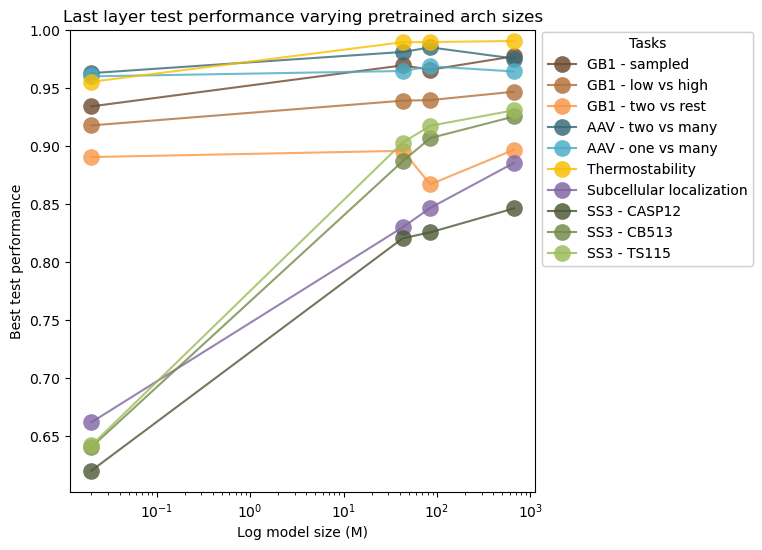

In [23]:
# Plot dots with colors corresponding to the category
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)

for category, group in esm_df.sort_values(["model_size"]).groupby("task"):
    ax.plot(
        group["model_size"],
        group["last_value"],
        marker="o",
        markersize=12,
        alpha=0.8,
        label=category,
        color=TASK_SIMPLE_COLOR_MAP.get(category, "gray"),
        mec="none"
    )

plt.xscale("log")

# Set y-axis limits
ax.set_ylim(bottom=None, top=1)

# Set labels and title
ax.set_xlabel("Log model size (M)")
ax.set_ylabel("Best test performance")
ax.set_title("Last layer test performance varying pretrained arch sizes")

ax.add_artist(ax.legend(title="Tasks", bbox_to_anchor=(1, 1.012), loc="upper left"))

# Show the plot
plt.show()

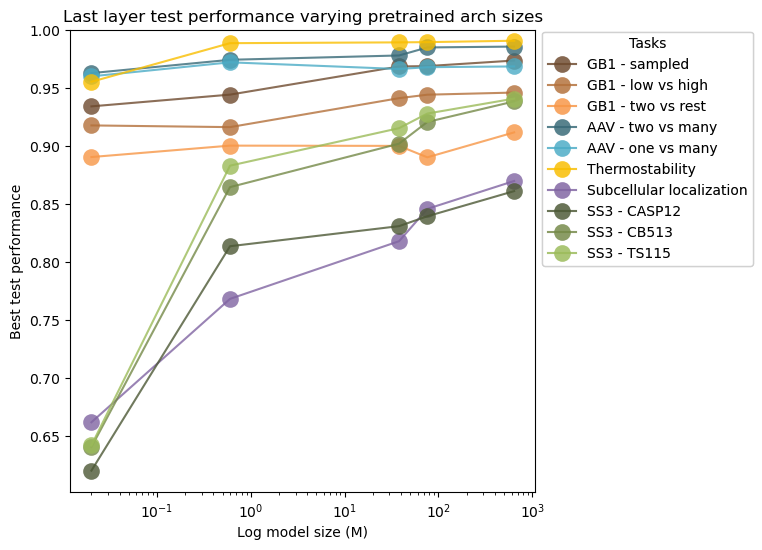

In [24]:
# Plot dots with colors corresponding to the category
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)

for category, group in carp_df.sort_values(["model_size"]).groupby("task"):
    ax.plot(
        group["model_size"],
        group["last_value"],
        marker="o",
        markersize=12,
        alpha=0.8,
        label=category,
        color=TASK_SIMPLE_COLOR_MAP.get(category, "gray"),
        mec="none"
    )

plt.xscale("log")

# Set y-axis limits
ax.set_ylim(bottom=None, top=1)

# Set labels and title
ax.set_xlabel("Log model size (M)")
ax.set_ylabel("Best test performance")
ax.set_title("Last layer test performance varying pretrained arch sizes")

ax.add_artist(ax.legend(title="Tasks", bbox_to_anchor=(1, 1.012), loc="upper left"))

# Show the plot
plt.show()

In [31]:
from matplotlib.lines import Line2D

from scr.params.emb import ARCH_TYPE

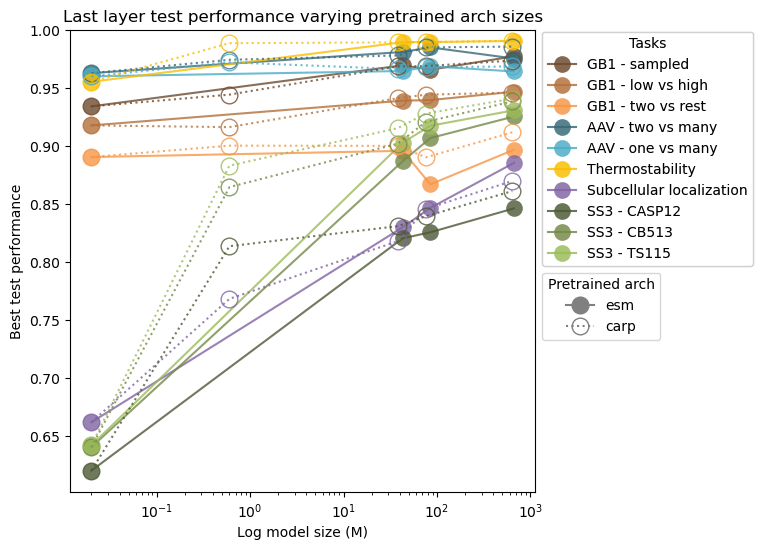

In [41]:
# try combining esm and carp
# Plot dots with colors corresponding to the category
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)

arch_style_dict = {"esm": "solid", "carp": "dotted"}

# get esm
for category, group in esm_df.sort_values(["model_size"]).groupby("task"):
    ax.plot(
        group["model_size"],
        group["last_value"],
        marker="o",
        markersize=12,
        alpha=0.8,
        linestyle="solid",
        label=category,
        color=TASK_SIMPLE_COLOR_MAP.get(category, "gray"),
        mec="none"
    )

for category, group in carp_df.sort_values(["model_size"]).groupby("task"):
    ax.plot(
        group["model_size"],
        group["last_value"],
        marker="o",
        markersize=12,
        alpha=0.8,
        linestyle="dotted",
        # label=category,
        color=TASK_SIMPLE_COLOR_MAP.get(category, "gray"),
        mfc="none"
    )

arch_legend_dict = {}

for arch in ARCH_TYPE:

    if arch == "carp":
        mfc = "none"
    else:
        mfc = "gray"

    arch_legend_dict[arch] = Line2D(
                                    [0],
                                    [0],
                                    marker="o",
                                    color="gray",
                                    linestyle=arch_style_dict[arch],
                                    label=arch,
                                    markerfacecolor="k",
                                    markersize=12,
                                    mfc=mfc
                                )

ax.add_artist(
        ax.legend(
            handles=list(arch_legend_dict.values()),
            bbox_to_anchor=(1, 0.49),
            loc="upper left",
            title="Pretrained arch",
        )
    )

plt.xscale("log")

# Set y-axis limits
ax.set_ylim(bottom=None, top=1)

# Set labels and title
ax.set_xlabel("Log model size (M)")
ax.set_ylabel("Best test performance")
ax.set_title("Last layer test performance varying pretrained arch sizes")

ax.add_artist(ax.legend(title="Tasks", bbox_to_anchor=(1, 1.012), loc="upper left"))

# Show the plot
plt.show()

In [ ]:
# if now we subtract onehot
# Subtract the values in the specified row from all other rows
df_subtracted = df.sub(df.iloc[row_to_subtract], axis=1).drop(index=row_to_subtract)
